### Simple linear regression

In [1]:
import numpy as np
import pandas as pd

In [284]:
d = {'no_of_rooms' : [1,2,3,4,5],'cost' : [500,600,700,800,900]}
df = pd.DataFrame(d)

## Data set

x = df[['no_of_rooms']]
y = df['cost']

### scikit-learn or sklearn

* sklearn is a python library used for Machine Learning.
* It provides Data Sets , Machine Learning Algorithm , Evaluation Metrics. 

In [285]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Model

lr = LinearRegression()

## Fiting data into the model

lr.fit(x,y)

## Predicting for concrete input

inp = np.array([7,8,9,10,11]).reshape(-1,1) ## reshape(-1,1) converts 1d array to 2d array
outp = lr.predict(inp)
print(outp)
print(lr.predict([[7]]))

## Finding Accuracy ..

print(lr.score(x,y)*100)

# Finding accuracy between actual values and predicted values

print(r2_score(outp,y))

[1100. 1200. 1300. 1400. 1500.]
[1100.]
100.0
-17.0


## Multivariate Linear Regression

In [286]:
d = {'rooms' : [1,2,3,4,5],'area': [200,250,300,350,400],'cost' : [500,600,700,800,900]}
df = pd.DataFrame(d)
x = df.drop('cost',axis = 1)
y = df['cost']

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x,y)
inp = np.array([[7,450],[6,500],[8,600],[9,400],[5,250]])
outp = lr.predict(inp)
print(outp)
print("Score = ",lr.score(x,y)*100)
print("Actual vs Predicted Score = ",r2_score(lr.predict(x),y)*100)

[1000.03998401 1099.96001599 1299.96001599  900.15993603  600.11995202]
Score =  100.0
Actual vs Predicted Score =  100.0


## Apply linear regression model onto Boston dataset

Boston data set consists of details about housing prices

In [288]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
lr = LinearRegression()
boston = load_boston()
# Reading data from boston  dataset
data1 = boston.data
cols = boston.feature_names
boston_data_df = pd.DataFrame(data1,columns = cols)
boston_data_df['target'] = boston.target


print("--------Simple Linear Regression (With One Feature)------------")
x = boston_data_df[['AGE']]
y = boston_data_df['target']
lr.fit(x,y)
inp = np.array([[46.7]])
print("Input = ",inp)
print("Predicts.. ",lr.predict(inp))
print("Score = " , lr.score(x,y)*100)
print("Actual vs Predicted = ",r2_score(lr.predict(x),y))


print("\n\n-------------- Multivariate Linear Regression -----------")
x = boston_data_df.drop('target',axis = 1)
y = boston_data_df['target']
lr.fit(x,y)
inp = np.array(x[7:8])
print("Input = ",inp)
outp = lr.predict(inp)
print("Predicts..",outp)
print("Score = ",lr.score(x,y)*100)
print("Analysis vs prediction = " , r2_score(lr.predict(x),y)*100)

--------Simple Linear Regression (With One Feature)------------
Input =  [[46.7]]
Predicts..  [25.22697868]
Score =  14.209474407780442
Actual vs Predicted =  -5.037557979290545


-------------- Multivariate Linear Regression -----------
Input =  [[1.4455e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.1720e+00
  9.6100e+01 5.9505e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9690e+02
  1.9150e+01]]
Predicts.. [19.53598843]
Score =  74.06426641094095
Analysis vs prediction =  64.98212316698574


### Correlation

Correlation is a relation between two Features

* value :
    *  0 - There is no correlation between two features
    *  1 - Correlation is positive
    * -1 - Correlation is negative

In [289]:
# Finding correlation
# Choosing Features ...

#boston_data_df.corr()
## Find the columns with higher correlation , Lower Correlation.


x = boston_data_df[['RM','ZN','LSTAT']]
y = boston_data_df['target']
lr.fit(x,y)
lr.score(x,y)


0.6398856030562653

## diabetes dataset

In [290]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.keys()
cols = diabetes.feature_names
diabetes_data = diabetes.data
df = pd.DataFrame(diabetes_data,columns = cols)
df['target'] = diabetes.target

x = df.drop('target',axis = 1)
y = df['target']
lr.fit(x,y)
inp = np.array(x[6:7])
outp = lr.predict(inp)
print(outp)
print("Score = ",lr.score(x,y))
print("Actual vs predicted = ",r2_score(lr.predict(x),y))

[73.89417947]
Score =  0.5177494254132934
Actual vs predicted =  0.06856376672605702


## Splitting data into training and testing sets

train_test_split()

In [291]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data,columns = iris.feature_names)
iris_df['target'] = iris.target

#iris_df.head()
iris_x = iris_df.drop('target',axis = 1)
iris_y = iris_df['target']

x_train,x_test,y_train,y_test = train_test_split(iris_x,iris_y,test_size = 0.3,random_state = 42)
lr.fit(x_train,y_train)
print("Score = ",lr.score(x_train,y_train)*100)
print("Score = ",lr.score(x_test,y_test)*100)
outp = lr.predict(x_test)
#print("Actual vs predicted = ",r2_score(outp , y_test))
outp

Score =  92.170450428608
Score =  94.42318571467433


array([ 1.24069097, -0.04537609,  2.24501083,  1.35143666,  1.29775083,
        0.01024241,  1.05031173,  1.82525399,  1.37084413,  1.06699186,
        1.70363485, -0.08712067, -0.165166  , -0.07724353, -0.03380619,
        1.40167699,  2.00651252,  1.04725931,  1.28368327,  1.97600474,
        0.01782354,  1.59952875,  0.079732  ,  1.92307532,  1.8621986 ,
        1.8790815 ,  1.80251247,  2.04196713,  0.01873817,  0.01291496,
       -0.15365607, -0.08046738,  1.18506728, -0.00461982, -0.02934265,
        1.68665136,  1.29088786, -0.07995434, -0.09076782, -0.16795331,
        1.75520461,  1.37514144,  1.3174234 , -0.07193336, -0.1131512 ])

### Checking for NULL values

In [292]:
print(iris_df.isnull())
iris_df.sum()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                False             False              False             False   
1                False             False              False             False   
2                False             False              False             False   
3                False             False              False             False   
4                False             False              False             False   
5                False             False              False             False   
6                False             False              False             False   
7                False             False              False             False   
8                False             False              False             False   
9                False             False              False             False   
10               False             False              False             False   
11               False      

sepal length (cm)    876.5
sepal width (cm)     458.6
petal length (cm)    563.7
petal width (cm)     179.9
target               150.0
dtype: float64

### Random rows from data frame

In [293]:
iris_df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
123,6.3,2.7,4.9,1.8,2
48,5.3,3.7,1.5,0.2,0
47,4.6,3.2,1.4,0.2,0


### Information about data frame

In [294]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Description of data frame

In [295]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Polynomial Regression

Used for non-linear data set

In [296]:
d={'emp_exp':[1,2,3,4,5,6,7,8,9,10],'emp_sal':[1100,1200,1400,1600,2200,2400,2600,3000,3200,3600]}
df=pd.DataFrame(d)
x = df[['emp_exp']]
y = df['emp_sal']
lr.fit(x,y)
lr.score(x,y)*100

98.48333354975264

In [297]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 4)
pf_x = pf.fit_transform(x)
lr.fit(pf_x,y)
lr.score(pf_x,y)

0.9936872155126689

### Data Visualization using matplotlib 

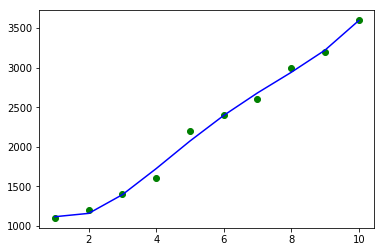

In [298]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color = 'green')
plt.plot(x,lr.predict(pf_x),color="blue")
plt.show()